<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

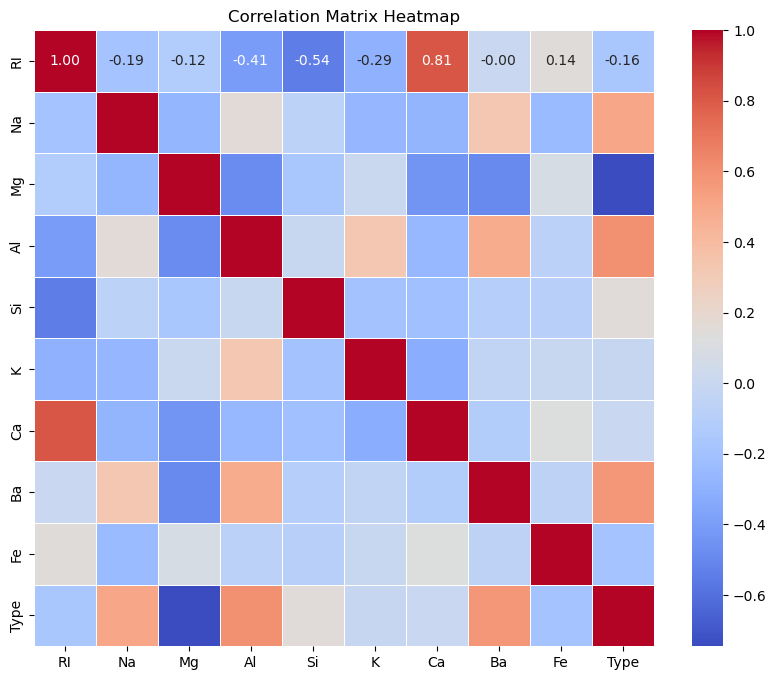

Accuracy with Euclidean distance (without sklearn): 0.5692307692307692
Accuracy with Manhattan distance (without sklearn): 0.6153846153846154


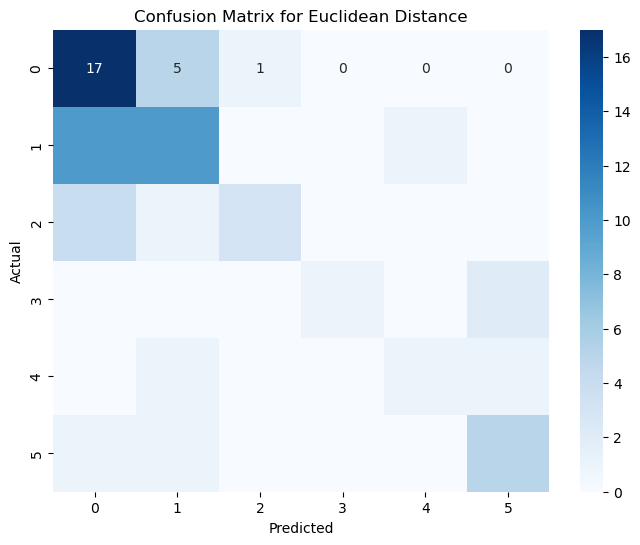

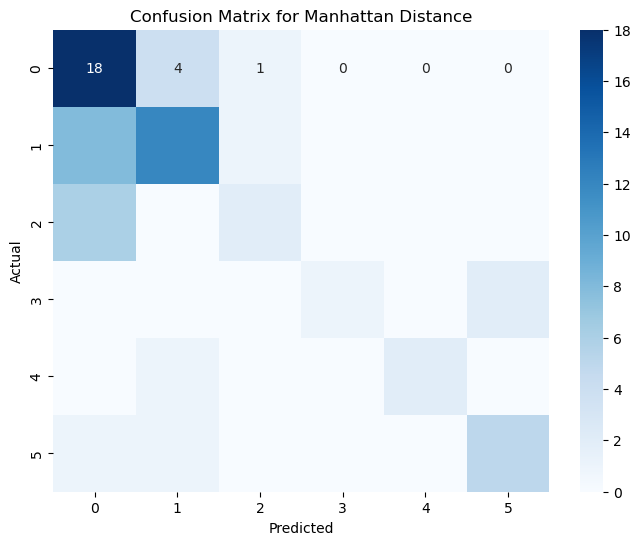

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k, distance_fn):
        self.k = k
        self.distance_fn = distance_fn
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        distances = [self.distance_fn(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


df = pd.read_csv("glass.csv")
print(df.info())
print(df.describe())
y = df['Type'].values
X = df.drop('Type', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

clf_euclidean = KNN(k=3, distance_fn=euclidean_distance)
clf_euclidean.fit(X_train, y_train)
predictions_euclidean = clf_euclidean.predict(X_test)
accuracy_euclidean = np.sum(predictions_euclidean == y_test) / len(y_test)
print("Accuracy with Euclidean distance (without sklearn):", accuracy_euclidean)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


clf_manhattan = KNN(k=3, distance_fn=manhattan_distance)
clf_manhattan.fit(X_train, y_train)
predictions_manhattan = clf_manhattan.predict(X_test)
accuracy_manhattan = np.sum(predictions_manhattan == y_test) / len(y_test)
print("Accuracy with Manhattan distance (without sklearn):", accuracy_manhattan)


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, predictions_euclidean, "Confusion Matrix for Euclidean Distance")
plot_confusion_matrix(y_test, predictions_manhattan, "Confusion Matrix for Manhattan Distance")